In [21]:
import pandas as pd

filename = input("Enter the name of the file without extension: ")
div_A = pd.read_csv(filename + '.csv', skiprows = 5, usecols = ['Description', 'Act2019', 'Act2020', 'Proj2021'])
div_A

Enter the name of the file without extension: IncStmt-DivA


,Description,Act2019,Act2020,Proj2021
0,NaN,NaN,NaN,NaN
1,Sales Revenue,43.9,40.3,50.2
2,Cost of Goods Sold,17.5,18.0,22.6
3,GROSS PROFIT,26.4,22.3,27.6
4,NaN,NaN,NaN,NaN
5,"Selling, General, and Admin",2.1,1.8,2.1
6,Advertising,1.3,1.2,1.5
7,Depreciation,2.6,2.5,3.2
8,Rental Expense,2.2,2.2,2.2
9,Other Expense,3.1,3.2,3.4


In [22]:
filename1 = input("Enter the name of the file without extension: ")
div_B = pd.read_csv(filename1 + '.csv', skiprows = 5, usecols = ['Description', 'Act2019', 'Act2020', 'Proj2021'])
div_B

Enter the name of the file without extension: IncStmt-DivB


,Description,Act2019,Act2020,Proj2021
0,NaN,NaN,NaN,NaN
1,Sales Revenue,33.9,30.3,33.9
2,Cost of Goods Sold,17.5,18.0,14.3
3,GROSS PROFIT,16.4,12.3,19.7
4,NaN,NaN,NaN,NaN
5,"Selling, General, and Admin",2.1,1.8,2.1
6,Advertising,1.3,1.2,4.5
7,Depreciation,2.1,2.0,3.2
8,Rental Expense,1.5,1.5,2.2
9,Other Expense,3.0,3.0,2.0


In [23]:
divA_revenue = div_A[["Act2019","Act2020","Proj2021"]].loc[1]
divA_revenue

Act2019     43.9
Act2020     40.3
Proj2021    50.2
Name: 1, dtype: float64

In [24]:
divB_revenue = div_B[["Act2019","Act2020","Proj2021"]].loc[1]
divB_revenue

Act2019     33.9
Act2020     30.3
Proj2021    33.9
Name: 1, dtype: float64

In [25]:
df = divA_revenue.to_frame().join(divB_revenue.to_frame(), how='outer', lsuffix='_DivisionA', rsuffix='_DivisionB')
df

,1_DivisionA,1_DivisionB
Act2019,43.9,33.9
Act2020,40.3,30.3
Proj2021,50.2,33.9


#a stacked bar chart showing the sales of the two divisions over time, both historically and predicted

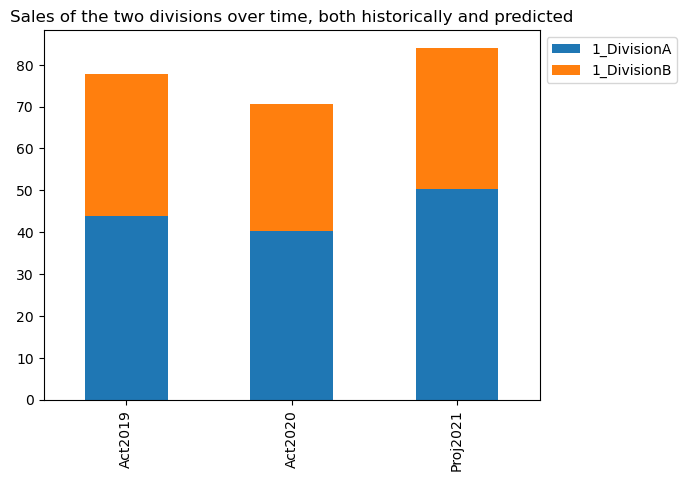

In [26]:
import matplotlib.pyplot as plt

df.plot(kind = 'bar', stacked = True)
plt.title('Sales of the two divisions over time, both historically and predicted')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

#a sales over time clustered bar chart that shows the sales of both divisions

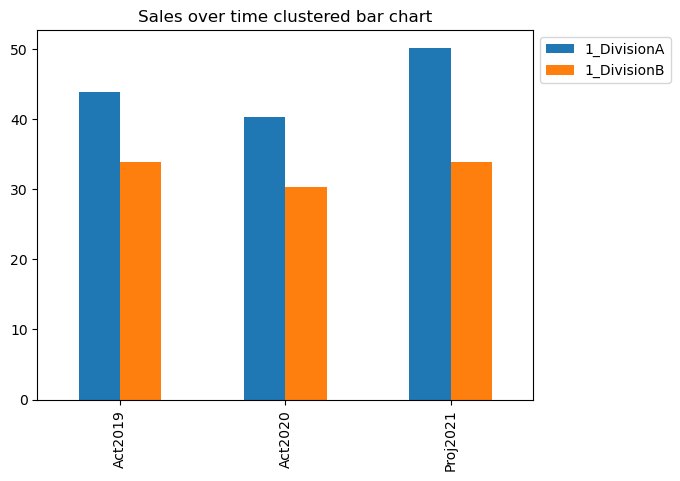

In [27]:
df[['1_DivisionA','1_DivisionB']].plot(kind = 'bar')
plt.title('Sales over time clustered bar chart')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

#Two distinct pie charts illustrating the different kinds of forecasted expenses for 2021, one for each division

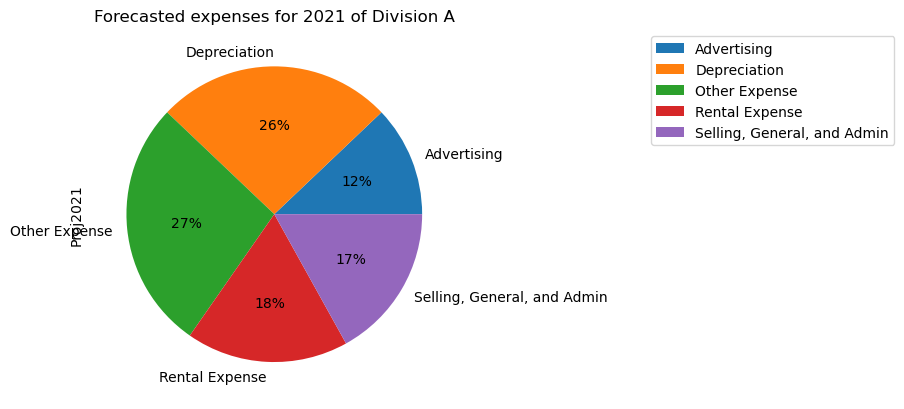

In [34]:
divA_expenses = div_A[["Description","Proj2021"]].loc[5:9]
divA_expenses.groupby(['Description']).sum().plot(kind = 'pie', y = 'Proj2021', autopct='%1.0f%%')
plt.title('Forecasted expenses for 2021 of Division A')
plt.legend(bbox_to_anchor = (1.5,1))
plt.show()

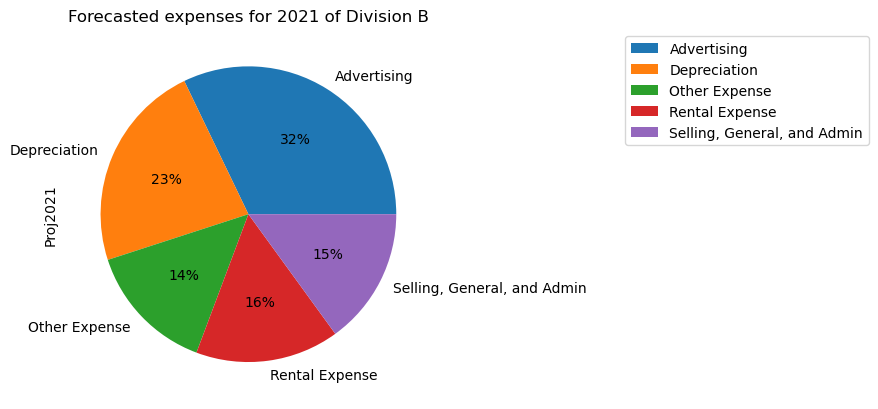

In [29]:
divB_expenses = div_B[["Description","Proj2021"]].loc[5:9]
divB_expenses.groupby(['Description']).sum().plot(kind = 'pie', y = 'Proj2021', autopct='%1.0f%%')
plt.title('Forecasted expenses for 2021 of Division B')
plt.legend(bbox_to_anchor = (1.5,1))
plt.show()